## Machine Learning test Competition


## Implementation

### Step 1: loading the data

<a href="https://www.kaggle.com/c/creditcardcompetitioncs6501">https://www.kaggle.com/c/creditcardcompetitioncs6501</a>

In [20]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
#loading the dataset (you have first to download the datasets from Kaggle
df_train = pd.read_csv("train.csv")
df_train

,Id,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,Category
0,487,1,24.500000,13.335,2,2,0,7,0.040,0,0,0,0,475,1
1,424,1,33.670000,2.165,1,0,1,7,1.500,0,0,0,1,0,1
2,608,1,31.568171,0.040,2,2,3,7,4.250,0,0,0,0,0,1
3,61,1,31.670000,16.165,1,0,3,7,3.000,1,1,9,0,730,0
4,631,0,27.250000,0.290,1,0,9,3,0.125,0,1,1,0,108,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,71,1,34.830000,4.000,1,0,3,0,12.500,1,0,0,0,0,1
536,106,1,28.750000,1.165,1,0,8,7,0.500,1,0,0,2,0,1
537,270,1,37.580000,0.000,1,0,1,7,0.000,0,0,0,1,0,0
538,435,1,19.000000,0.000,2,2,5,2,0.000,0,1,4,0,1,1


In [21]:
#loading the test  dataset
df_test = pd.read_csv("test.csv")
df_test

,Id,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income
0,286,0,31.568171,1.50,1,0,5,2,0.000,0,1,2,0,105
1,511,0,46.000000,4.00,1,0,7,4,0.000,1,0,0,0,960
2,257,1,20.000000,0.00,1,0,3,7,0.500,0,0,0,0,0
3,336,1,47.330000,6.50,1,0,1,7,1.000,0,0,0,0,228
4,318,1,19.170000,0.00,2,2,9,0,0.000,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,292,1,25.420000,0.54,1,0,12,7,0.165,0,1,1,0,444
146,314,1,16.250000,0.00,2,2,0,7,0.250,0,0,0,0,0
147,534,1,31.830000,2.50,1,0,0,7,7.500,1,0,0,0,0
148,18,1,21.830000,0.25,1,0,3,3,0.665,1,0,0,0,0


## Kaggle competition
This is a realistic situation
1. we have a problem we aim to solve: credit card approval automation
2. we will use ML to learn how humans address this task using a set of examples (train dataset)
    * What is the most suitable (best) algorithm for this task?
    * How do we measure performance?
    * How do we select the best algorithm?
3. Production: we will finally deliver our final solution and predict the output for test set for which we **do not know** the Class (1 approved, 0 not-approved)

### What is the most suitable (best) algorithm for this task?
This is a classification problem, so we should use a classifier
The input are a mix of 

continuous variables:

   * age, debt, YearsEmployed, Income
   
discrete variables (ordinal):

   * EducationLevel, CreditScore
   
and categorical variables

   * Married, BankCustomer etc.
   

### How do we measure performance?
   * Accuracy (see Evaluation tab in Kaggle)
   
### How do we select the best algorithm
   * we aim to minimize the generalisation error, so via **cross-validation**

### Data visualisation

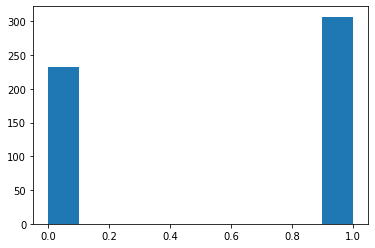

In [22]:
plt.hist(df_train.iloc[:,-1].values);## class frequencies

The majority class is $1$, this is useful because we can use the accuracy of the majority class
classifier as baseline.



In [23]:
len(np.where(df_train.iloc[:,-1].values==1)[0])/len(df_train.iloc[:,-1].values)

0.5685185185185185

### Step 2: 10-fold Cross-validation
To minimize the generalization error, we evaluate the performance of our ML solution via cross-validation.

**Rule-of-thumb:** we use 10-fold CV because it works well in practice.


In [24]:
from IPython.display import Image
Image("../CV.png",width=1100)

In [25]:
#We convert data into numpy arrays
id_person=df_train.iloc[:,0].values # column of customer id
X = df_train.iloc[:,1:-1].values # column of the inputs
y = df_train.iloc[:,-1].values # column of the output

### 10-fold CV loop
This is a generic 10-fold CV loop.

In [26]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
Accuracy=[]
for train_indices, test_indices in k_fold.split(X):
    #print('Train: %s | test: %s' % (train_indices, test_indices))
    X_train, X_test, y_train, y_test =X[train_indices], X[test_indices], y[train_indices], y[test_indices]
    #(A) data pre-processing (e.g., discretisation, scaling)
    # ... discretisation, scaling
    
    #(B)  ML algorithm fitting

    
    # (C) Prediction

    
    # (D) Score 
    Accuracy.append(accuracy_score(y_test,y_test_pred))
    
print("Average 10-fold cross-validation accuracy=",np.mean(np.array(Accuracy)))

NameError: name 'y_test_pred' is not defined

## Algorithm 1
we use logistic regression, by assuming that all the inputs are continuous.
We can do it because categorical variables are numeric in our dataset.

In [27]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
k_fold = KFold(n_splits=10,  shuffle=True, random_state=42)
Accuracy=[]
for train_indices, test_indices in k_fold.split(X):
    #print('Train: %s | test: %s' % (train_indices, test_indices))
    X_train, X_test, y_train, y_test =X[train_indices], X[test_indices], y[train_indices], y[test_indices]
    #(A) data pre-processing (e.g., discretisation, scaling)
    # ... discretisation, scaling    
    #(B)  ML algorithm fitting
    clf = LogisticRegression(random_state=0, solver='lbfgs')
    clf.fit(X_train, y_train)
    
    # (C) Prediction
    y_test_pred = clf.predict(X_test)

    
    # (D) Score 
    Accuracy.append(accuracy_score(y_test,y_test_pred))
    
print("Average 10-fold cross-validation accuracy=",np.mean(np.array(Accuracy)))

Average 10-fold cross-validation accuracy= 0.8407407407407407


/home/shravan/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/shravan/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/shravan/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/shravan/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/shravan/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


Note all these warnings. To fit a logistic regression problem, we use a numerical optimisation.

This can lead to convergence problem, that is the algorithm stops before reaching the optimal value of the parameters
of the logistic regression model.

To reduce the effects of this problem, a **rule-of-thumb** is to scale the inputs so that all the inputs
vary between -3 and 3 (approximatively)

In [28]:
from sklearn.preprocessing import StandardScaler

scalerX = StandardScaler()
scalerX.fit(X_train)
X_train_n = scalerX.transform(X_train)

np.set_printoptions(suppress=True)
print("Original", X_train[0,:])
print("\n Transformed", X_train_n[0,:])
print("\n What StandardScaler really does:", ((X_train-np.mean(X_train,axis=0))/np.std(X_train,axis=0))[0,:])

Original [  1.     24.5    13.335   2.      2.      0.      7.      0.04    0.
   0.      0.      0.    475.   ]

 Transformed [ 0.65529517 -0.61724287  1.80848632  1.72741469  1.73443163 -1.33003915
  0.72945123 -0.7020807  -1.03348203 -0.87594105 -0.48693351 -0.31285135
 -0.08416884]

 What StandardScaler really does: [ 0.65529517 -0.61724287  1.80848632  1.72741469  1.73443163 -1.33003915
  0.72945123 -0.7020807  -1.03348203 -0.87594105 -0.48693351 -0.31285135
 -0.08416884]


## Improving logistic regression via scaling

In [30]:
k_fold = KFold(n_splits=10,  shuffle=True, random_state=42)
Accuracy=[]
for train_indices, test_indices in k_fold.split(X):
    #print('Train: %s | test: %s' % (train_indices, test_indices))
    X_train, X_test, y_train, y_test =X[train_indices], X[test_indices], y[train_indices], y[test_indices]
    #(A) data pre-processing 
    scalerX = StandardScaler()
    scalerX.fit(X_train)
    X_train_n = scalerX.transform(X_train)
    X_test_n  = scalerX.transform(X_test )
    
    #(B)  ML algorithm fitting
    clf = LogisticRegression(random_state=0, solver='lbfgs', C=1)
    clf.fit(X_train_n, y_train)    
    # (C) Prediction
    y_test_pred = clf.predict(X_test_n)    
    # (D) Score 
    Accuracy.append(accuracy_score(y_test,y_test_pred))
    
print("Average 10-fold cross-validation accuracy=",np.mean(np.array(Accuracy)))

Average 10-fold cross-validation accuracy= 0.8703703703703705


We obtained a better performance and no-warnings anymore. 

Note the instruction

`X_test_n  = scalerX.transform(X_test )`

that is we transform the test set using the scalerX we fitted with the training dataset. 
In this way, the test dataset is always independent to the training dataset and this allows us to avoid overfitting. 

**Rules-of-thumb:** anytime in sklearn you use a function that does `fit`, then you must only apply that function to the training dataset only. Otherwise you can risk overfitting.

### Algorithm 1: production step
Now that we are happy with algorithm 1, we can move to the "production" phase when we really use our ML solution to predict unseen data (the test set).

First, we take our best Algorithm and train it with all the training data. 

Second, we compute the prediction on the test set

Third, we build the solution file that needs to be uploaded in Kaggle.

In [52]:
#we use all train data:
X_train = X
y_train = y

#We convert test data into numpy arrays
id_person = df_test.iloc[:,0].values # column of customer id
X_test_final = df_test.iloc[:,1:].values # column of the inputs
X_test_final

array([[  0.        ,  31.56817109,   1.5       , ...,   2.        ,
          0.        , 105.        ],
       [  0.        ,  46.        ,   4.        , ...,   0.        ,
          0.        , 960.        ],
       [  1.        ,  20.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  1.        ,  31.83      ,   2.5       , ...,   0.        ,
          0.        ,   0.        ],
       [  1.        ,  21.83      ,   0.25      , ...,   0.        ,
          0.        ,   0.        ],
       [  1.        ,  48.08      ,   3.75      , ...,   0.        ,
          0.        ,   2.        ]])

In [35]:
scalerX = StandardScaler()
scalerX.fit(X_train)
X_train_n = scalerX.transform(X_train)
X_test_n  = scalerX.transform(X_test_final )

#(B)  ML algorithm fitting
clf = LogisticRegression(random_state=0, solver='lbfgs')
clf.fit(X_train_n, y_train)

# (C) Prediction
y_test_pred = clf.predict(X_test_n)

In [36]:
#we format the prediction in the right-format for Kaggle and save it into a csv file
Prediction = pd.DataFrame()
Prediction.insert(0, 'Id', id_person.astype(int))
Prediction.insert(1, 'Category', y_test_pred.astype(int))
Prediction.to_csv("Prediction_logistic.csv", index=False)
Prediction

,Id,Category
0,286,1
1,511,0
2,257,1
3,336,1
4,318,1
5,211,0
6,624,1
7,176,0
8,462,1
9,256,1


## Ideas for improving
1. Try  MultinomialNB with discretisation of continuous features only

In [54]:
from sklearn.neural_network import MLPClassifier


In [75]:
k_fold = KFold(n_splits=10,  shuffle=True, random_state=42)
Accuracy=[]
for train_indices, test_indices in k_fold.split(X):
    #print('Train: %s | test: %s' % (train_indices, test_indices))
    X_train, X_test, y_train, y_test =X[train_indices], X[test_indices], y[train_indices], y[test_indices]
    #(A) data pre-processing 
    scalerX = StandardScaler()
    scalerX.fit(X_train)
    X_train_n = scalerX.transform(X_train)
    X_test_n  = scalerX.transform(X_test )
    
    #(B)  ML algorithm fitting
    clf = MLPClassifier(hidden_layer_sizes=(3,2),max_iter=500000,activation="logistic",solver="lbfgs", random_state=42)
    clf.fit(X_train_n, y_train)    
    # (C) Prediction
    y_test_pred = clf.predict(X_test_n)    
    # (D) Score 
    Accuracy.append(accuracy_score(y_test,y_test_pred))
    
print("Average 10-fold cross-validation accuracy=",np.mean(np.array(Accuracy)))

Average 10-fold cross-validation accuracy= 0.861111111111111


## List of Classifiers
Classifiers that accept continuous inputs

In [ ]:
#GaussianNB is very similar to MultinomialNB but for continuous inputs)
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()


#Discriminat Analysis (it is a Bayesian classifier as MultinomialNB but for continuous inputs)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf = QuadraticDiscriminantAnalysis()

#SVM (similar to logistic regression/neural networks)
from sklearn import svm
clf = svm.SVC(kernel='linear') #linear SVM
clf = svm.SVC(kernel='poly',degree=3) #polynomial degree 3 SVM
clf = svm.SVC(kernel='rbf') # similar to a neural network

#One layer Neural Network with 5 hidden units
mlp = MLPRegressor(hidden_layer_sizes=(5,), max_iter=300000,activation="logistic",solver="lbfgs")

#Deep Neural Network with 5,4,3 hidden units
mlp = MLPRegressor(hidden_layer_sizes=(5,4,3), max_iter=300000,activation="logistic",solver="lbfgs")


In [ ]:
# Classifiers that accept categorical inputs
from sklearn.naive_bayes import MultinomialNB
 clf = MultinomialNB()
    

 All these classifiers have either parameters (e.g., degree=3, hidden_layer_sizes=(5,))
or smoothing parameters (like alpha in MultinomialNB) that you can optimize via 10-fold cross-validation.